In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("attribution_data.csv")
df.head()

,cookie,time,interaction,conversion,conversion_value,channel
0,00000FkCnDfDDf0iC97iC703B,2018-07-03T13:02:11Z,impression,0,0.0,Instagram
1,00000FkCnDfDDf0iC97iC703B,2018-07-17T19:15:07Z,impression,0,0.0,Online Display
2,00000FkCnDfDDf0iC97iC703B,2018-07-24T15:51:46Z,impression,0,0.0,Online Display
3,00000FkCnDfDDf0iC97iC703B,2018-07-29T07:44:51Z,impression,0,0.0,Online Display
4,0000nACkD9nFkBBDECD3ki00E,2018-07-03T09:44:57Z,impression,0,0.0,Paid Search


In [3]:
df_filtered_conversion = df[df['conversion']== 1]
df_filtered_conversion

,cookie,time,interaction,conversion,conversion_value,channel
22,0007oEBhnoF97AoEE3BCkFnhB,2018-07-06T13:45:29Z,conversion,1,6.5,Paid Search
23,00090n9EBBEkA000C7Cik999D,2018-07-05T06:53:53Z,conversion,1,8.0,Facebook
83,000h3n9nC0hFhE3CCnkkAof7n,2018-07-19T14:31:57Z,conversion,1,6.0,Facebook
109,000hCBnCB7oi7ADAEnEBCnBEE,2018-07-25T11:15:16Z,conversion,1,6.5,Online Video
124,000kiDB3D0fCfDAohCDB3ohko,2018-07-26T16:16:21Z,conversion,1,7.5,Facebook
...,...,...,...,...,...,...
586663,oooEAi9EoC7F3A33037h0khk3,2018-07-25T14:42:17Z,conversion,1,7.0,Online Video
586690,oooh7FDi0hBnEDBii70hfEf93,2018-07-27T19:25:29Z,conversion,1,6.0,Online Display
586701,oooik3A7A7FA9oof3hDfin7CB,2018-07-12T08:53:23Z,conversion,1,7.5,Online Display
586707,oookCEDh03D7oo3f0FkB799E7,2018-07-29T21:25:54Z,conversion,1,6.0,Online Video


In [4]:
last_touch = pd.DataFrame(round(df_filtered_conversion["channel"].value_counts(normalize=True) * 100, 2))
last_touch.columns = ["Weight (%)"]
last_touch

,Weight (%)
channel,
Facebook,30.05
Paid Search,25.78
Online Video,19.32
Instagram,12.72
Online Display,12.13


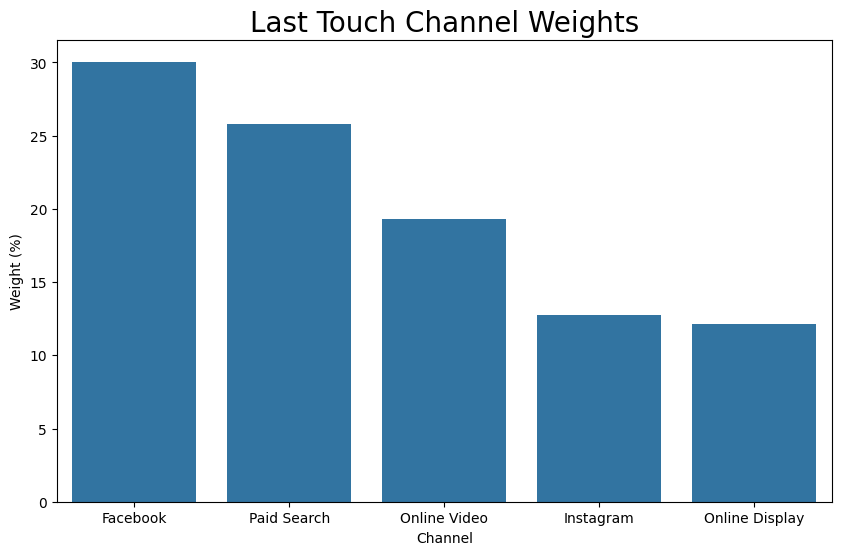

In [5]:
plt.subplots(figsize=(10, 6))
sns.barplot(data=last_touch, x=last_touch.index, y='Weight (%)')
plt.xlabel('Channel')
plt.title('Last Touch Channel Weights', fontsize=20)
plt.savefig('plot/last_touch.png')